In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


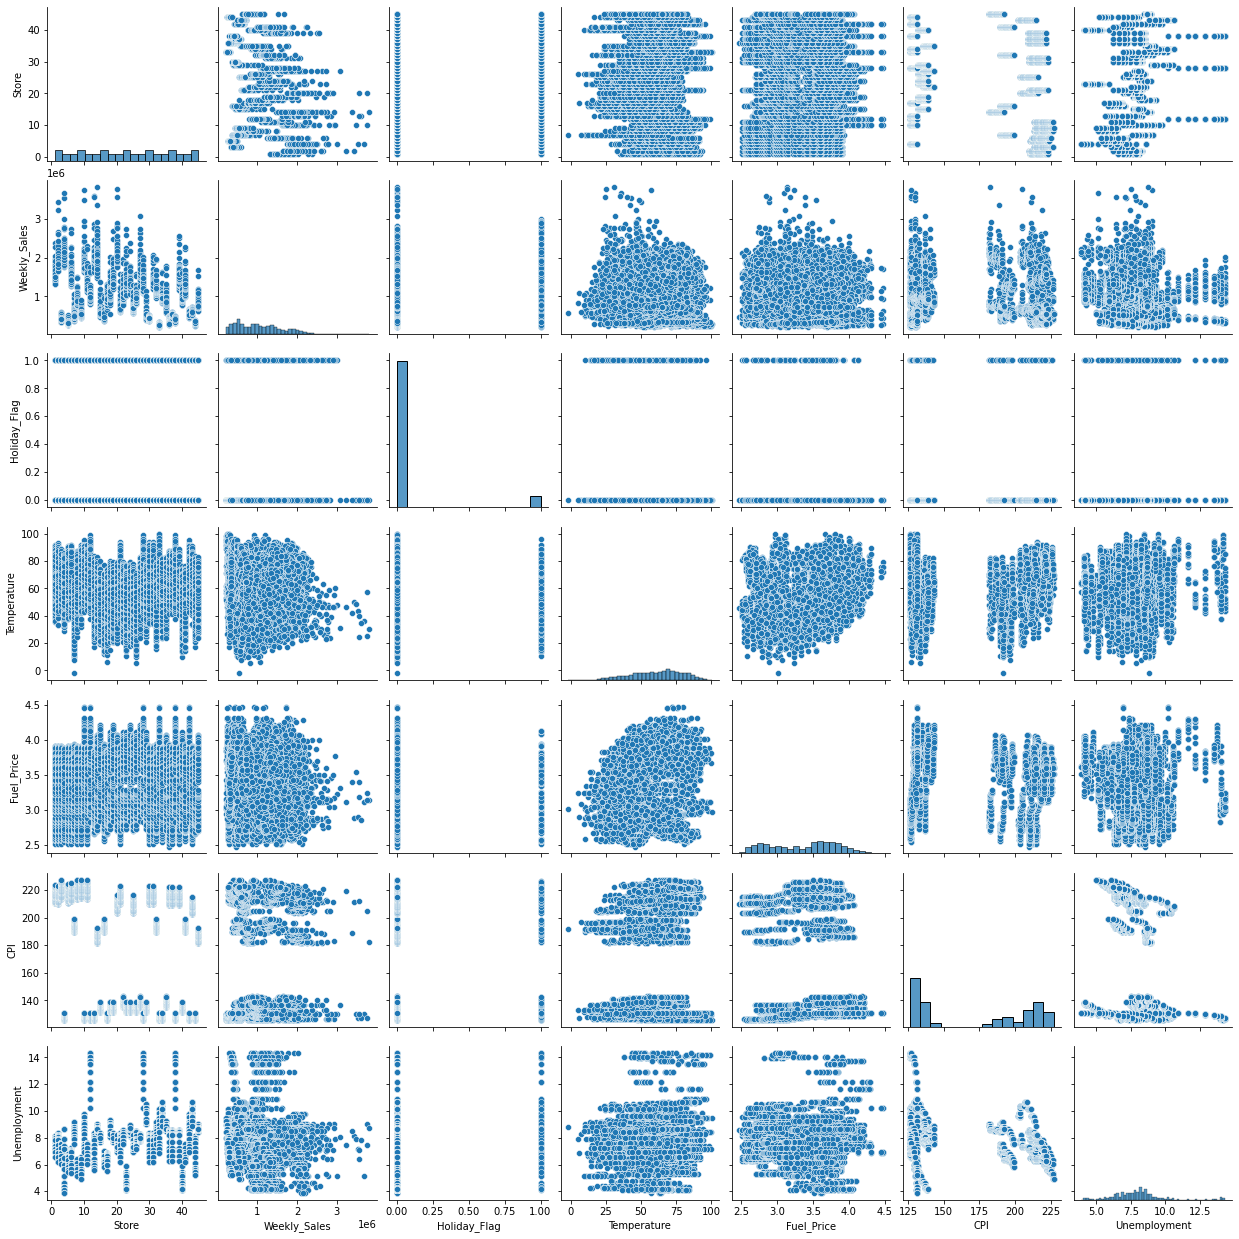

In [6]:
sns.pairplot(df)

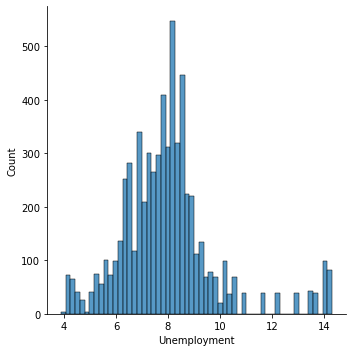

In [7]:
sns.displot(df['Unemployment'])

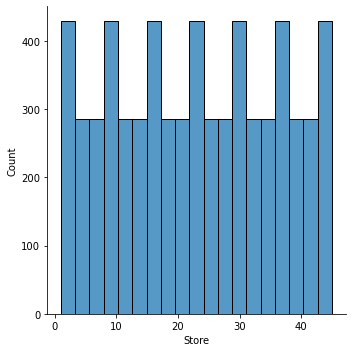

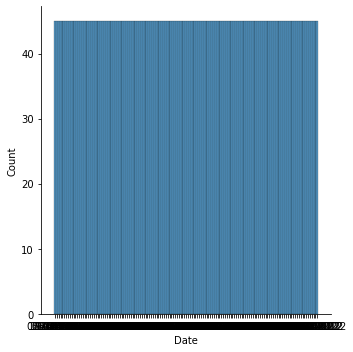

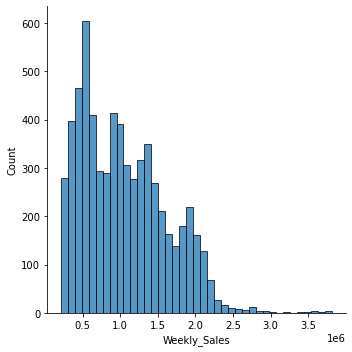

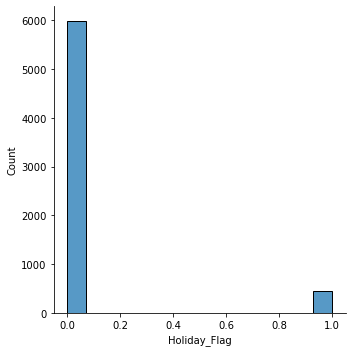

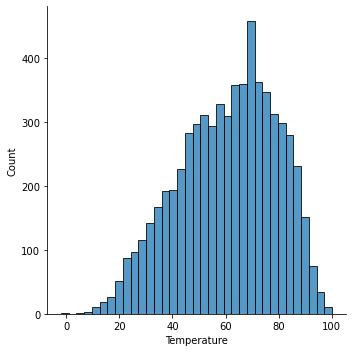

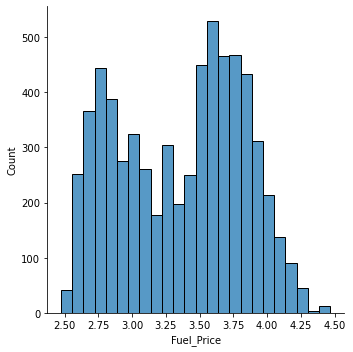

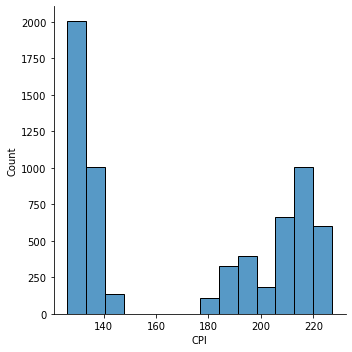

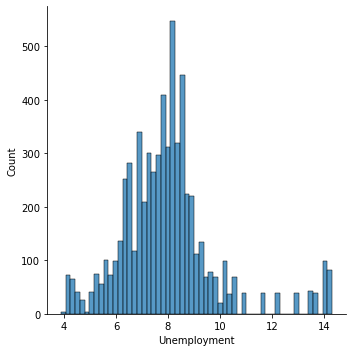

In [8]:
for i in df.columns:
    sns.displot(df[i])

In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
df.head(1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.9,0,42.31,2.572,211.096358,8.106


In [11]:
x = df.drop(['Store','Date','Unemployment','Holiday_Flag'],axis=1)
y = df['Unemployment']

In [12]:
x

,Weekly_Sales,Temperature,Fuel_Price,CPI
0,1643690.90,42.31,2.572,211.096358
1,1641957.44,38.51,2.548,211.242170
2,1611968.17,39.93,2.514,211.289143
3,1409727.59,46.63,2.561,211.319643
4,1554806.68,46.50,2.625,211.350143
...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558
6431,733455.07,64.89,3.985,192.170412
6432,734464.36,54.47,4.000,192.327265
6433,718125.53,56.47,3.969,192.330854


In [13]:
y

0       8.106
1       8.106
2       8.106
3       8.106
4       8.106
        ...  
6430    8.684
6431    8.667
6432    8.667
6433    8.667
6434    8.667
Name: Unemployment, Length: 6435, dtype: float64

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train = scaler.fit_transform(x)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(train,y,test_size=0.3,random_state=10)

In [23]:
x_train

array([[-0.07101737, -0.88506969, -0.91638663, -0.8840899 ],
       [-1.25060566,  0.02310936, -0.74644608, -1.1470847 ],
       [ 0.75435238,  0.56313703,  0.02918002,  1.13907434],
       ...,
       [ 1.57091707,  0.19281685,  0.59129107, -1.09720164],
       [-1.46575696, -0.42040733, -0.45885438, -1.13053584],
       [ 1.88981867, -0.13250102, -0.9664973 , -1.14480114]])

In [24]:
lm = LinearRegression()
logmodel = LogisticRegression()
gnb = GaussianNB()

In [25]:
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
lm.score(x_test,y_test)*100

13.524320710932237

In [27]:
pred = lm.predict(x_test)
pred

array([7.95856804, 8.67247921, 7.32469296, ..., 8.84686832, 7.19720716,
       7.33437978])

In [28]:
y_test

890     9.017
2125    8.150
686     5.801
3089    8.023
2661    7.866
        ...  
2823    6.961
2732    7.856
4681    7.603
2729    7.856
788     6.925
Name: Unemployment, Length: 1931, dtype: float64

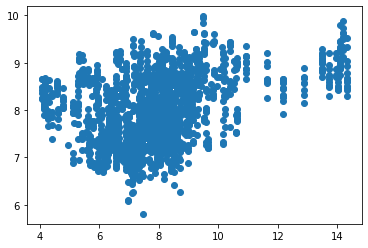

In [29]:
plt.scatter(y_test,pred)

In [31]:
gnb.fit(x_train,y_train)

ValueError: Unknown label type: (array([ 3.879,  4.077,  4.125,  4.145,  4.156,  4.261,  4.308,  4.42 ,
        4.584,  4.607,  4.781,  4.954,  5.114,  5.124,  5.143,  5.217,
        5.277,  5.287,  5.326,  5.329,  5.401,  5.407,  5.422,  5.435,
        5.527,  5.539,  5.603,  5.621,  5.644,  5.667,  5.668,  5.679,
        5.765,  5.774,  5.801,  5.825,  5.847,  5.892,  5.936,  5.943,
        5.946,  5.964,  5.965,  6.034,  6.054,  6.061,  6.078,  6.104,
        6.123,  6.132,  6.162,  6.169,  6.17 ,  6.195,  6.228,  6.232,
        6.235,  6.262,  6.29 ,  6.297,  6.299,  6.3  ,  6.315,  6.334,
        6.338,  6.339,  6.38 ,  6.384,  6.392,  6.403,  6.404,  6.415,
        6.416,  6.425,  6.432,  6.433,  6.442,  6.465,  6.489,  6.496,
        6.51 ,  6.529,  6.547,  6.548,  6.551,  6.56 ,  6.565,  6.566,
        6.573,  6.589,  6.614,  6.617,  6.623,  6.634,  6.635,  6.664,
        6.697,  6.745,  6.759,  6.768,  6.774,  6.833,  6.842,  6.855,
        6.858,  6.866,  6.868,  6.877,  6.885,  6.891,  6.895,  6.901,
        6.906,  6.908,  6.925,  6.934,  6.943,  6.961,  6.973,  6.986,
        6.989,  7.007,  7.039,  7.057,  7.082,  7.092,  7.127,  7.138,
        7.139,  7.143,  7.147,  7.17 ,  7.193,  7.197,  7.224,  7.241,
        7.244,  7.259,  7.274,  7.28 ,  7.287,  7.293,  7.335,  7.343,
        7.346,  7.348,  7.363,  7.368,  7.372,  7.382,  7.396,  7.405,
        7.441,  7.467,  7.47 ,  7.484,  7.489,  7.503,  7.508,  7.527,
        7.541,  7.543,  7.545,  7.551,  7.557,  7.564,  7.567,  7.574,
        7.598,  7.603,  7.61 ,  7.658,  7.671,  7.682,  7.706,  7.716,
        7.725,  7.742,  7.753,  7.767,  7.771,  7.787,  7.795,  7.804,
        7.806,  7.808,  7.818,  7.827,  7.838,  7.85 ,  7.852,  7.856,
        7.866,  7.872,  7.874,  7.896,  7.906,  7.907,  7.931,  7.943,
        7.951,  7.962,  7.972,  7.982,  7.992,  8.   ,  8.009,  8.01 ,
        8.021,  8.023,  8.028,  8.058,  8.067,  8.075,  8.09 ,  8.099,
        8.106,  8.107,  8.117,  8.119,  8.149,  8.15 ,  8.163,  8.177,
        8.185,  8.187,  8.193,  8.2  ,  8.211,  8.212,  8.237,  8.239,
        8.243,  8.252,  8.253,  8.256,  8.257,  8.275,  8.283,  8.3  ,
        8.304,  8.316,  8.324,  8.326,  8.348,  8.35 ,  8.358,  8.36 ,
        8.395,  8.424,  8.433,  8.442,  8.445,  8.454,  8.458,  8.464,
        8.471,  8.476,  8.488,  8.494,  8.512,  8.513,  8.521,  8.523,
        8.535,  8.549,  8.554,  8.567,  8.572,  8.595,  8.622,  8.623,
        8.625,  8.659,  8.665,  8.667,  8.684,  8.687,  8.693,  8.724,
        8.743,  8.744,  8.745,  8.763,  8.818,  8.839,  8.861,  8.876,
        8.89 ,  8.899,  8.951,  8.953,  8.963,  8.975,  8.983,  8.988,
        8.992,  9.003,  9.014,  9.017,  9.051,  9.131,  9.137,  9.14 ,
        9.151,  9.199,  9.202,  9.262,  9.265,  9.269,  9.285,  9.331,
        9.342,  9.357,  9.419,  9.495,  9.521,  9.524,  9.575,  9.593,
        9.653,  9.765,  9.816,  9.849,  9.863,  9.966, 10.064, 10.115,
       10.148, 10.16 , 10.199, 10.21 , 10.256, 10.398, 10.409, 10.524,
       10.581, 10.641, 10.926, 11.627, 12.187, 12.89 , 13.503, 13.736,
       13.975, 14.021, 14.099, 14.18 , 14.313]),)